# Task 2 - Prediction Using Decision Tree Algorithm 

## Author - Akalbir Singh Chadha

## Problem Statement: -
### Create the Decision Tree classifier and visualize it graphically.
### ● The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Importing Dependencies or Packages

In [2]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### The algorithm that will be used for prediction is Decision Tree Classification algorithm

### Importing The Dataset

In [6]:
df = pd.read_csv('Iris.csv')
df.drop(['Id'],axis = 1, inplace = True)
print("-----------Data Imported Sucessfully-----------")
df.head(15)

-----------Data Imported Sucessfully-----------


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Visualizing The Given Data by: -
 ### Box Plot


-----------Box Plot Visualization Of The Data-------------


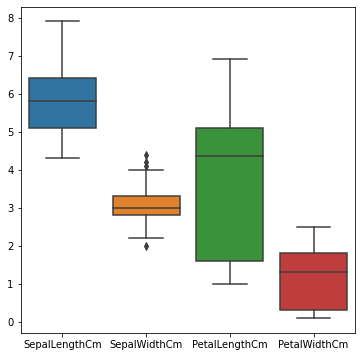

In [8]:
# Box Plot
plt.figure(figsize = (6,6))
sns.boxplot(data = df.iloc[:,0:4])
print("-----------Box Plot Visualization Of The Data-------------")
plt.show()

### Preparing The Data for Training The Model

In [8]:
df['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df['Species']= label_encoder.fit_transform(df['Species']) 
df['Species'].unique() 
x = df.iloc[: ,0:4]
y = df['Species']

### Training The Dataset

In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


### Training The Data For The Algorithm

In [26]:
from sklearn.tree import DecisionTreeClassifier
irisTree = DecisionTreeClassifier(criterion='entropy')

irisTree.fit(X_train, y_train)

predTree = irisTree.predict(X_test)


comp = pd.DataFrame({'Actual': y_test, 'Predicted': predTree })
comp['Difference'] = comp['Actual'] - comp['Predicted']
comp.head(10)

,Actual,Predicted,Difference
47,0,0,0
3,0,0,0
31,0,0,0
25,0,0,0
15,0,0,0
118,2,2,0
89,1,1,0
6,0,0,0
103,2,2,0
65,1,1,0


### Evaluation Of The Model
This decides the accuracy of the Model.

In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))


DecisionTrees's Accuracy:  1.0


### Visualizing The Decision Tree

The most important part of this algorithm is the visualization because it consits of the predicted species after considering all the conditions.

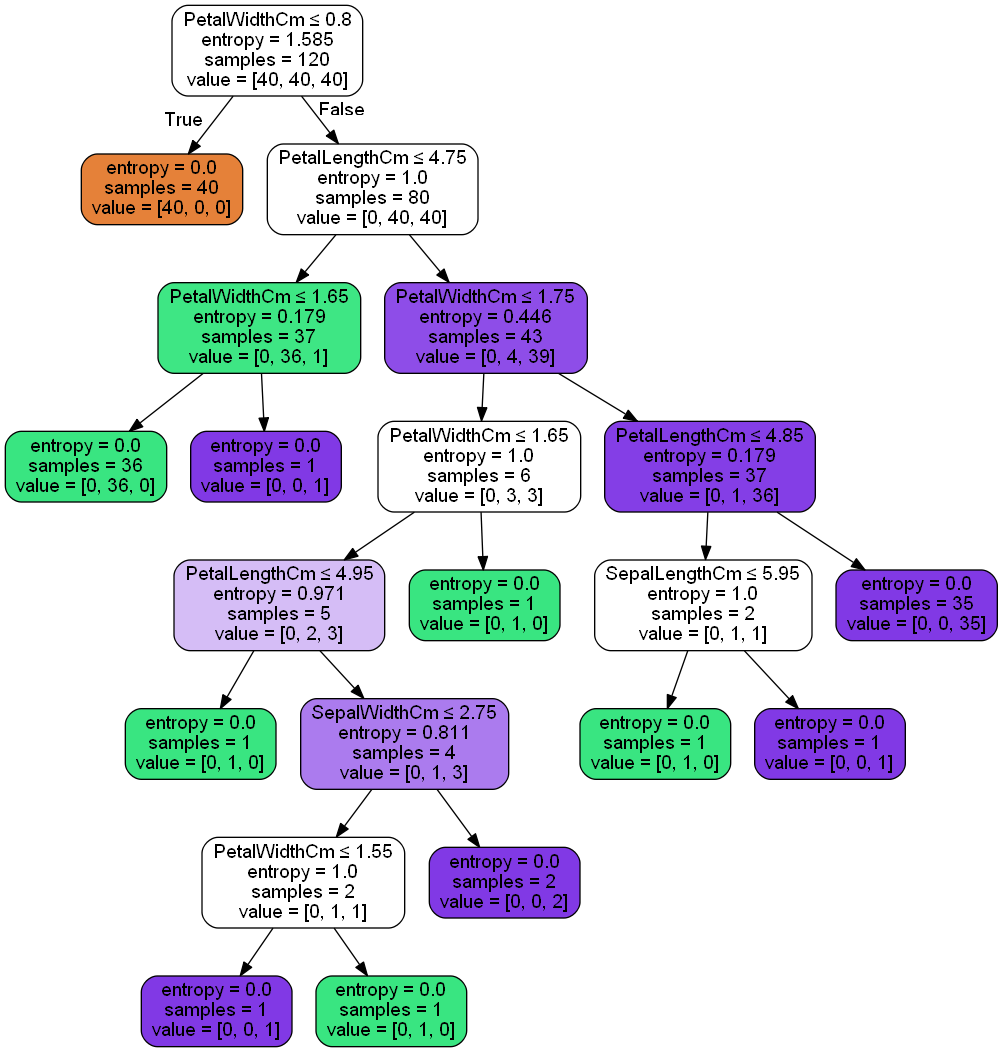

In [32]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz/bin/'

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(irisTree, out_file=dot_data, feature_names=df.columns[0:4],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())